In [1]:
import networkx as nx
import pandas as pd
import stellargraph as sg
import graphnets
from graphnets import gcn_pipeline, graphsage_pipeline

In [2]:
network = pd.read_csv('data/bio-pathways-network.csv')
graph = nx.from_pandas_edgelist(network, 'Gene ID 1', 'Gene ID 2')

In [3]:
multi_diseases = pd.read_csv('data/all-proteins.csv', index_col=0)
binary_diseases = pd.read_csv('data/binary-classes.csv', index_col=0)
multi_only_diseases = pd.read_csv('data/diseased-proteins.csv', index_col=0)

In [4]:
three_orbitals_exact = pd.read_csv('motifs location/result3.csv', index_col=0)
three_orbitals = pd.read_csv('motifs location/subsampling_3.csv', index_col=1).drop('Unnamed: 0', axis=1)
four_orbitals = pd.read_csv('motifs location/subsampling_4.csv', index_col=1).drop('Unnamed: 0', axis=1)

In [5]:
nodes = set(graph.nodes())
drop_rows = []
for n in multi_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
node_multi_diseases = multi_diseases.drop(drop_rows)

In [6]:
dis_graph = nx.read_gml('networks/diseased-ppi')
dis_graph = nx.relabel_nodes(dis_graph, lambda x: int(x), copy=False)
nodes = set(dis_graph.nodes())
drop_rows = []
for n in multi_only_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
dis_nodes_multi = multi_only_diseases.drop(drop_rows)

In [7]:
motif3_exact_multi_only_diseases = dis_nodes_multi.join(three_orbitals_exact)
motif3_exact_multi_diseases = pd.concat([node_multi_diseases,three_orbitals_exact], axis=1)

motif3_multi_only_diseases = dis_nodes_multi.join(three_orbitals)
motif3_multi_diseases = pd.concat([node_multi_diseases,three_orbitals], axis=1)

motif4_multi_only_diseases = dis_nodes_multi.join(four_orbitals)
motif4_multi_diseases = pd.concat([node_multi_diseases,four_orbitals], axis=1)

**Original**

Full Network

In [8]:
G = sg.StellarGraph(graph, node_features=node_multi_diseases)

<ipython-input-8-8a30284b6d2f>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G = sg.StellarGraph(graph, node_features=node_multi_diseases)


Array shapes:
 train = (4311, 30)
 val = (8623, 30)
 test = (8623, 30)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 1.4560 - acc: 0.0673 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.4560

acc: 0.0673

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


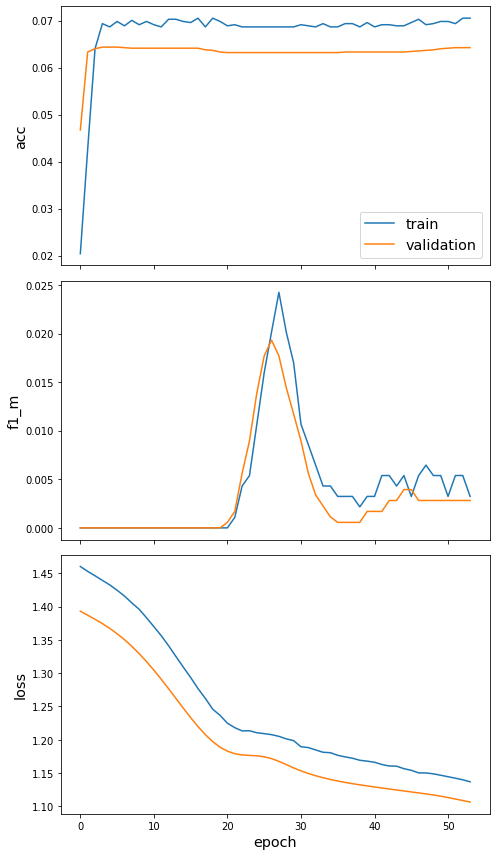

In [9]:
gcn_pipeline(G, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 30)
 val = (8623, 30)
 test = (8623, 30)
Training...
173/173 [==============================] - 3s 17ms/step - loss: 1.1974 - acc: 0.0659 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.1974

acc: 0.0659

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


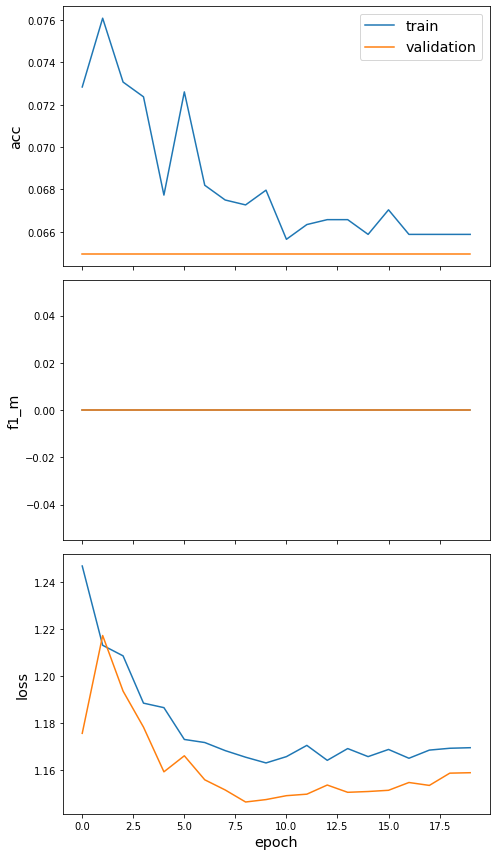

In [10]:
graphsage_pipeline(G, node_multi_diseases)

Diseased Network

In [11]:
dG = sg.StellarGraph(dis_graph, node_features=dis_nodes_multi)

<ipython-input-11-07ede7d5e95a>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG = sg.StellarGraph(dis_graph, node_features=dis_nodes_multi)


Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 1ms/step - loss: 3.9146 - acc: 0.4061 - f1_m: 0.0417 - precision_m: 0.9367 - recall_m: 0.0213

Test Set Metrics:

loss: 3.9146

acc: 0.4061

f1_m: 0.0417

precision_m: 0.9367

recall_m: 0.0213


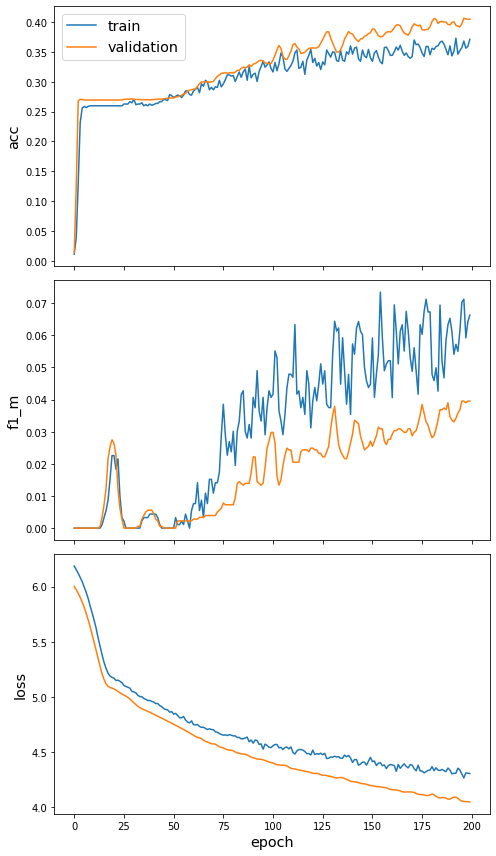

In [12]:
gcn_pipeline(dG, dis_nodes_multi, layer_sizes=[32,32])

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Training...
41/41 [==============================] - 1s 17ms/step - loss: 4.8954 - acc: 0.2744 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 4.8954

acc: 0.2744

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


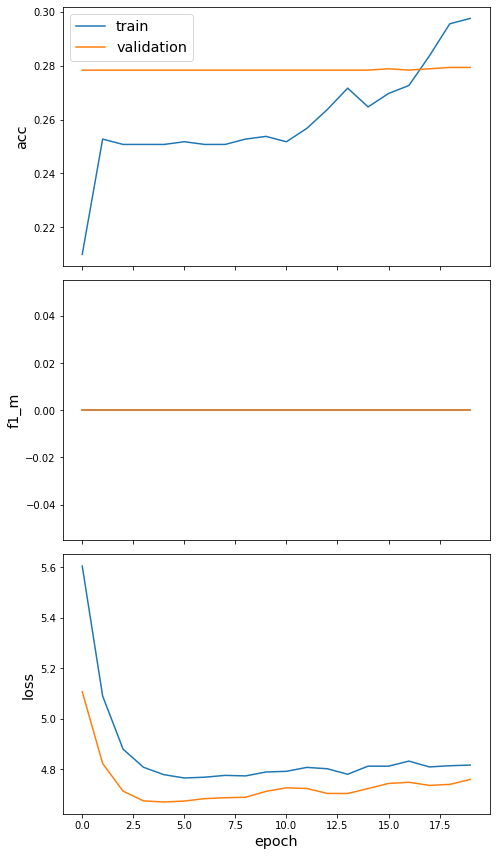

In [13]:
graphsage_pipeline(dG, dis_nodes_multi)

**3-graphlet**

*Exact*

Full Network

In [14]:
G_motif3_exact = sg.StellarGraph(graph, node_features=motif3_exact_multi_diseases)
G_motif3_exact.info()

<ipython-input-14-0a379d3d880d>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif3_exact = sg.StellarGraph(graph, node_features=motif3_exact_multi_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 35\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 30)
 val = (8623, 30)
 test = (8623, 30)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 5.2634 - acc: 0.0634 - f1_m: 0.1380 - precision_m: 0.0984 - recall_m: 0.2312

Test Set Metrics:

loss: 5.2634

acc: 0.0634

f1_m: 0.1380

precision_m: 0.0984

recall_m: 0.2312


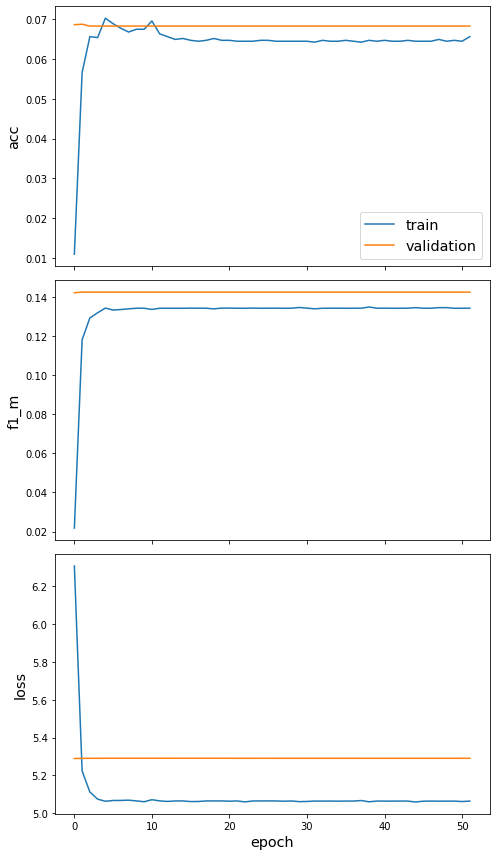

In [15]:
gcn_pipeline(G_motif3_exact, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 30)
 val = (8623, 30)
 test = (8623, 30)
Training...
173/173 [==============================] - 3s 18ms/step - loss: 1.2355 - acc: 0.0688 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.2355

acc: 0.0688

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


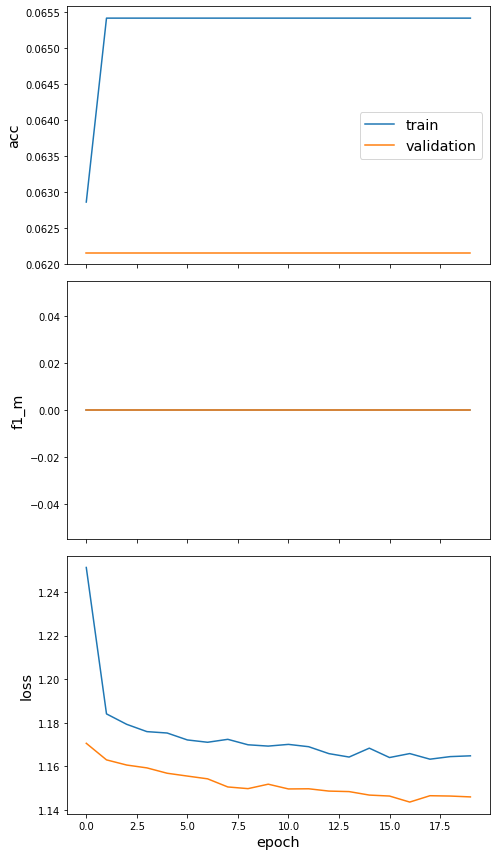

In [16]:
graphsage_pipeline(G_motif3_exact, node_multi_diseases)

Diseased Network

In [17]:
dG_motif3_exact = sg.StellarGraph(dis_graph, node_features=motif3_exact_multi_only_diseases)
dG_motif3_exact.info()

<ipython-input-17-215c69b81a22>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif3_exact = sg.StellarGraph(dis_graph, node_features=motif3_exact_multi_only_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 35\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 24.9778 - acc: 0.1938 - f1_m: 0.1681 - precision_m: 0.2349 - recall_m: 0.1309

Test Set Metrics:

loss: 24.9778

acc: 0.1938

f1_m: 0.1681

precision_m: 0.2349

recall_m: 0.1309


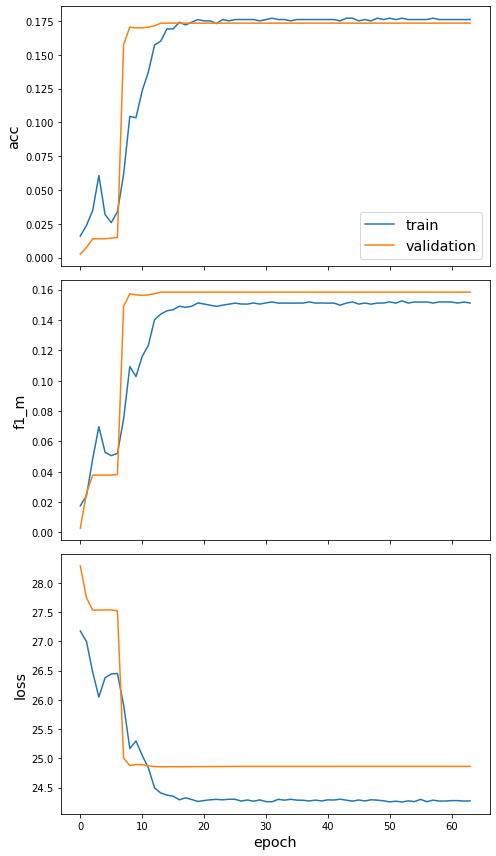

In [18]:
gcn_pipeline(dG_motif3_exact, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Training...
41/41 [==============================] - 1s 17ms/step - loss: 5.0965 - acc: 0.2684 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 5.0965

acc: 0.2684

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


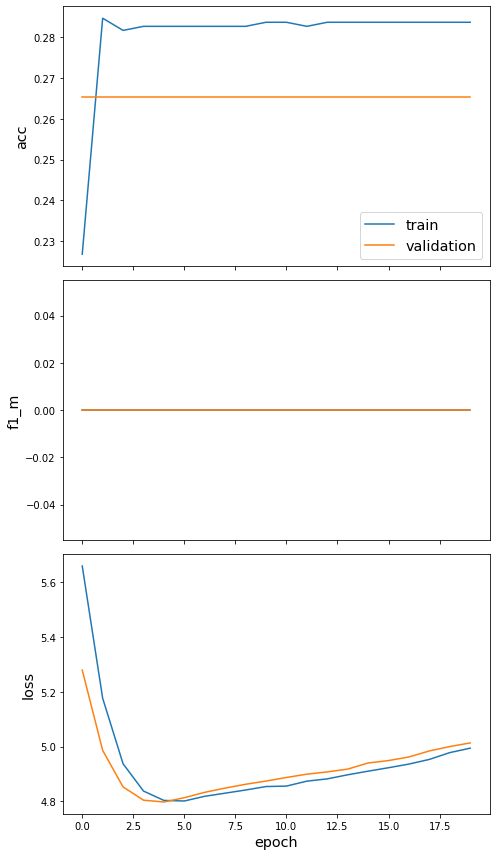

In [19]:
graphsage_pipeline(dG_motif3_exact, dis_nodes_multi)

*Subsampled*

Full Network

In [20]:
G_motif3_subsampled = sg.StellarGraph(graph, node_features=motif3_multi_diseases)
G_motif3_subsampled.info()

<ipython-input-20-40f765a525c1>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif3_subsampled = sg.StellarGraph(graph, node_features=motif3_multi_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 33\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 30)
 val = (8623, 30)
 test = (8623, 30)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 5.1832 - acc: 0.0682 - f1_m: 0.1487 - precision_m: 0.1066 - recall_m: 0.2458

Test Set Metrics:

loss: 5.1832

acc: 0.0682

f1_m: 0.1487

precision_m: 0.1066

recall_m: 0.2458


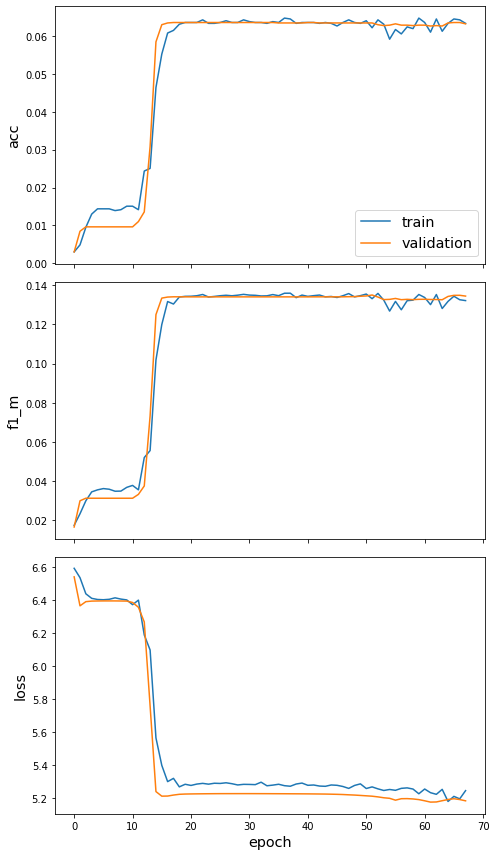

In [26]:
gcn_pipeline(G_motif3_subsampled, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 30)
 val = (8623, 30)
 test = (8623, 30)
Training...
173/173 [==============================] - 3s 17ms/step - loss: 1.1935 - acc: 0.0681 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.1935

acc: 0.0681

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


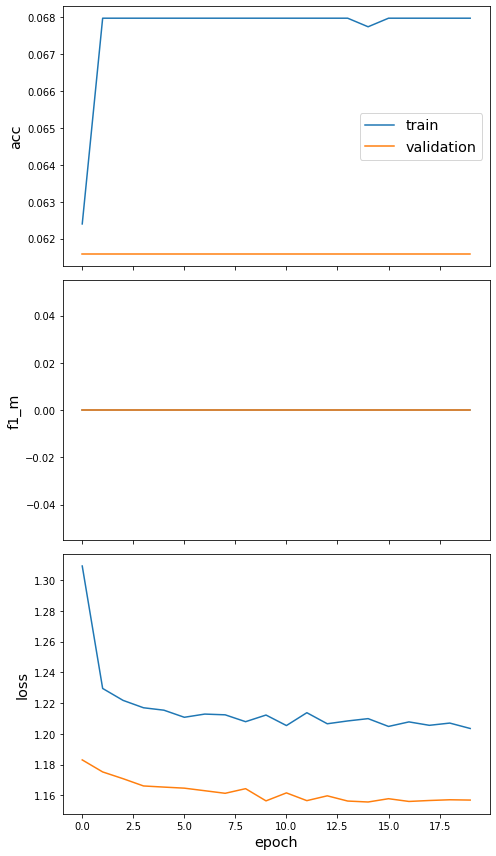

In [22]:
graphsage_pipeline(G_motif3_subsampled, node_multi_diseases)

Diseased Network

In [23]:
dG_motif3_subsampled = sg.StellarGraph(dis_graph, node_features=motif3_multi_only_diseases)
dG_motif3_subsampled.info()

<ipython-input-23-7f7ffa041d30>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif3_subsampled = sg.StellarGraph(dis_graph, node_features=motif3_multi_only_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 33\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 22.5855 - acc: 0.2575 - f1_m: 0.2862 - precision_m: 0.4038 - recall_m: 0.2216

Test Set Metrics:

loss: 22.5855

acc: 0.2575

f1_m: 0.2862

precision_m: 0.4038

recall_m: 0.2216


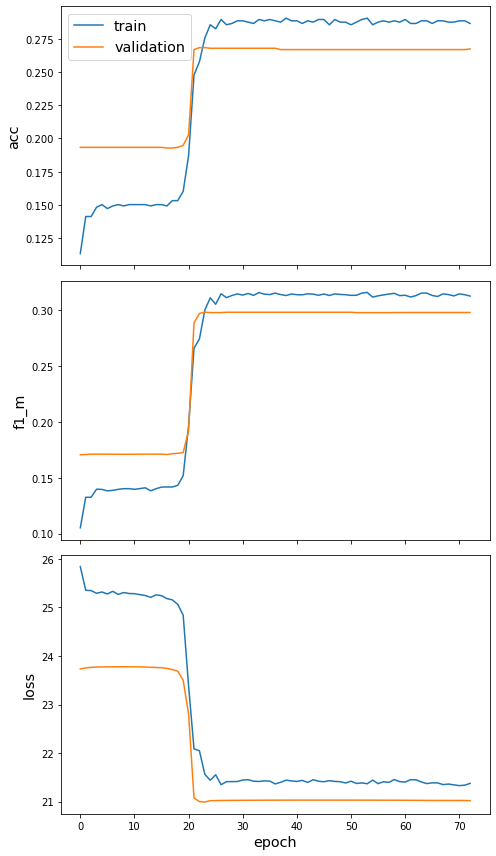

In [27]:
gcn_pipeline(dG_motif3_subsampled, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Training...
41/41 [==============================] - 1s 17ms/step - loss: 5.1333 - acc: 0.2768 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 5.1333

acc: 0.2768

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


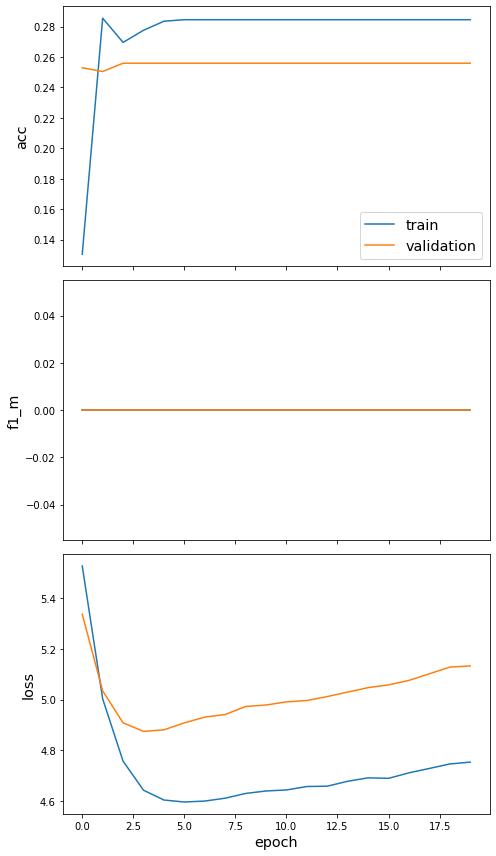

In [28]:
graphsage_pipeline(dG_motif3_subsampled, dis_nodes_multi)

**4-graphlet**

Full Network

In [29]:
G_motif4 = sg.StellarGraph(graph, node_features=motif4_multi_diseases)
G_motif4.info()

<ipython-input-29-8e6892762401>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif4 = sg.StellarGraph(graph, node_features=motif4_multi_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 41\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 30)
 val = (8623, 30)
 test = (8623, 30)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 5.2573 - acc: 0.0652 - f1_m: 0.1388 - precision_m: 0.0990 - recall_m: 0.2322

Test Set Metrics:

loss: 5.2573

acc: 0.0652

f1_m: 0.1388

precision_m: 0.0990

recall_m: 0.2322


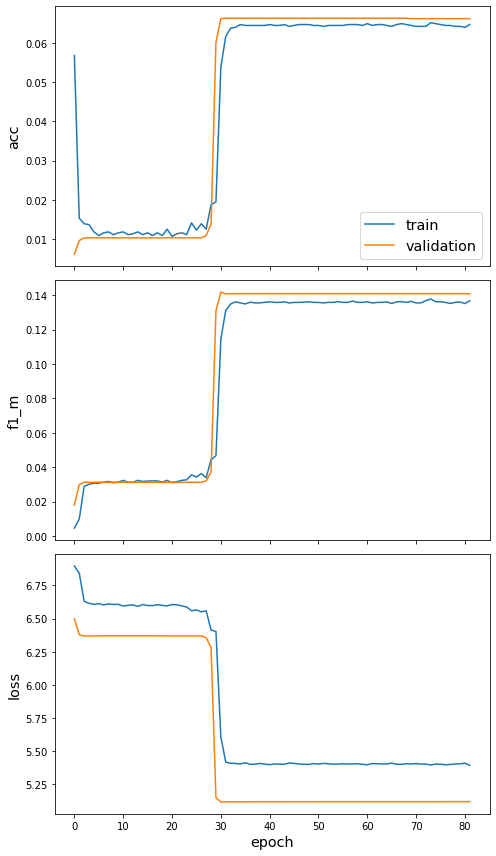

In [30]:
gcn_pipeline(G_motif4, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 30)
 val = (8623, 30)
 test = (8623, 30)
Training...
173/173 [==============================] - 3s 18ms/step - loss: 1.1675 - acc: 0.0632 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.1675

acc: 0.0632

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


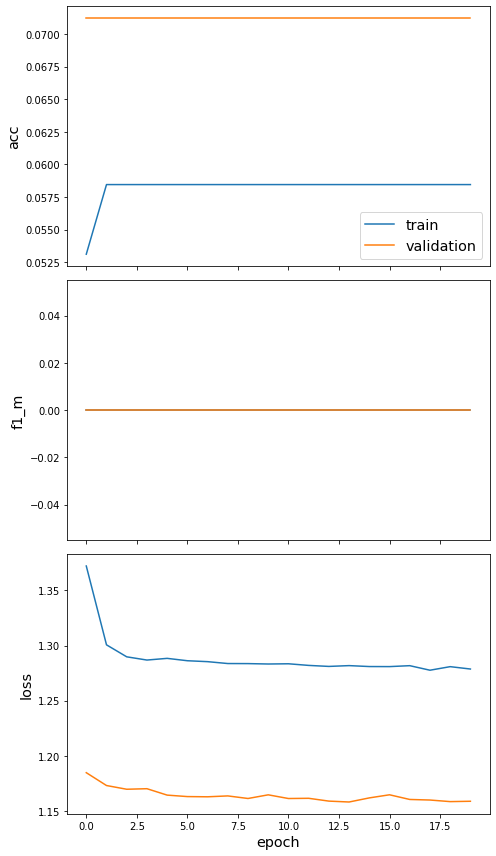

In [31]:
graphsage_pipeline(G_motif4, node_multi_diseases)

Diseased Network

In [32]:
dG_motif4 = sg.StellarGraph(dis_graph, node_features=motif4_multi_only_diseases)
dG_motif4.info()

<ipython-input-32-3db6296b5753>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif4 = sg.StellarGraph(dis_graph, node_features=motif4_multi_only_diseases)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 41\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 22.2594 - acc: 0.2594 - f1_m: 0.2944 - precision_m: 0.4123 - recall_m: 0.2289

Test Set Metrics:

loss: 22.2594

acc: 0.2594

f1_m: 0.2944

precision_m: 0.4123

recall_m: 0.2289


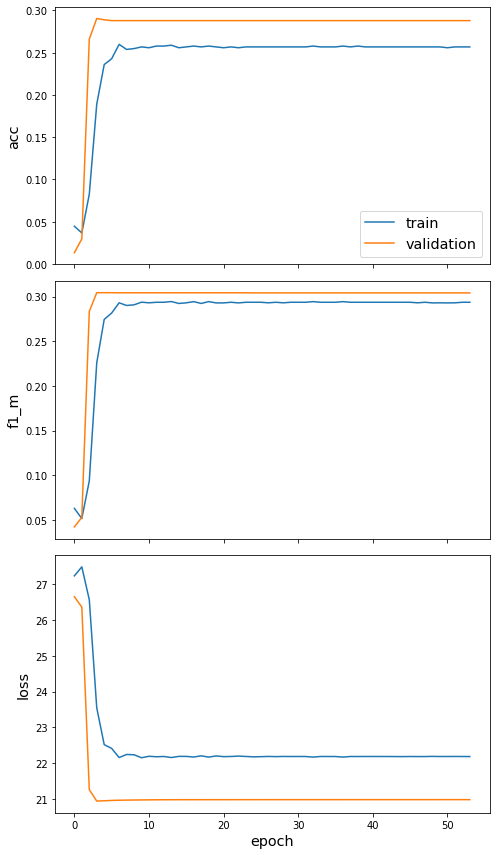

In [33]:
gcn_pipeline(dG_motif4, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 30)
 val = (2012, 30)
 test = (2012, 30)
Training...
41/41 [==============================] - 1s 17ms/step - loss: 4.9593 - acc: 0.2739 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 4.9593

acc: 0.2739

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


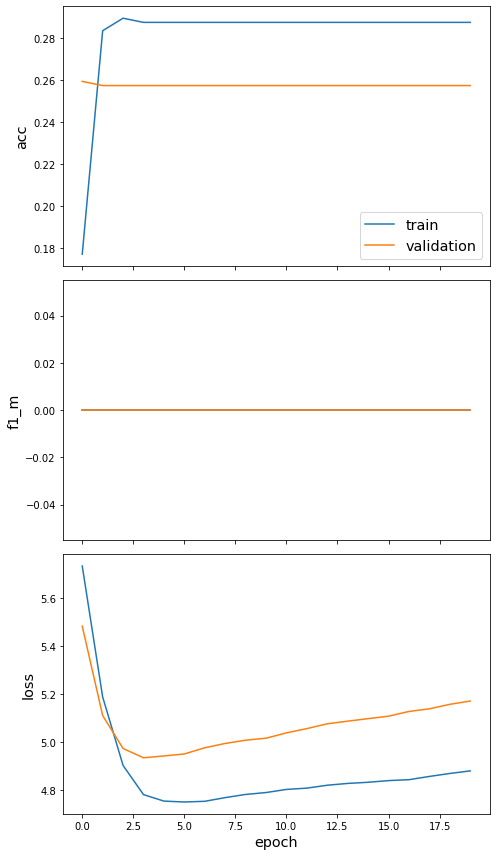

In [34]:
graphsage_pipeline(dG_motif4, dis_nodes_multi)